In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**ML4.1**

Чтение файла

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Выделим целевую переменную и обучим модель логистической регрессии

In [ ]:
y = data["output"]
x = data.drop("output", axis=1)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548

Разделим датасет на две выборки, на тестовую и обучающую

In [ ]:
x_train, y_train = x[:200], y[:200]
x_train.shape, y_train.shape

((200, 13), (200,))

In [ ]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

Заново обучаем модель

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.5339805825242718)

Выразим количество объектов для обучающей выборки через процент от всех объектов

In [ ]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8884297520661157, 0.6229508196721312)

In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Можно заметить, что вы первой половине данных целевая переменная всегда положительная, а во второй - отрицательная.

Заведем массив булевских значений, в которых количество истинных значений будет соответствовать желаемому объему обучающей выборки, а ложных - объему тестовой

In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

Перемешаем этот массив

In [ ]:
from numpy.random import shuffle

shuffle(mask)
mask

array([ True,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Смысл этого приема в том, что мы можем применить одну и ту же маску к обоим частям массива. А если инвертировать эту маску, то выберем оставшиеся значения:

In [ ]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8347107438016529, 0.8852459016393442)

Готовая функция

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Построение метрик качества классификации

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Первым делом построим матрицу классификации. Она показывает, как часто и в каких классах модель ошибается. В идеальной модели ненулевые значения должны быть только на главной диагонали

In [ ]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)
confusion_matrix(y_train, y_train_pred)

array([[ 84,  28],
       [ 10, 120]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[19,  7],
       [ 2, 33]])

Отчет классификации. Он показывает всю основную информацию по итогам классификации.

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.82      0.94      0.88        35

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.84        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.842975,0.852459
Precision,0.810811,0.825000
Recall,0.923077,0.942857
F1,0.863309,0.880000


**ML4.2**

Датасет для бинарной классификации

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

Разделим выборку на обучающую и тестовую.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

Создадим и обучим на обучающей выборке простую модель логистической регрессии

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

Мы получили матрицу вероятностей

Для построения кривой ROC используем встроенную в sklearn функцию roc_curve. Данная функция возвражает три массива: значения метрики FPR (false positive rate), TPR (true positive rate) и значение порога. Фактически, данная функция берет определенное количество значений порога (в промежутке от 0 до 1), применяет данный порог для точной классификации, исходя из переданной ей матрицы вероятностей, и вычисляет при данном значении порога две упомянутые метрики.

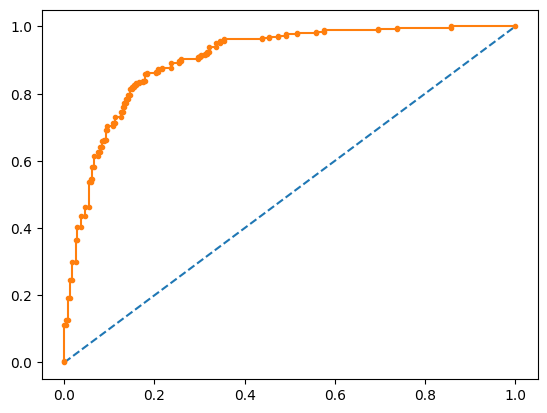

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Боле четкую оценку даст метрика ROC-AUC, измеряющая площадь под графиком данной кривой.

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.9027724358974359)

Давайте по аналогии построим график PR-кривой. Из лекции мы знаем, что он строится по аналогичному признаку, но в других координатах

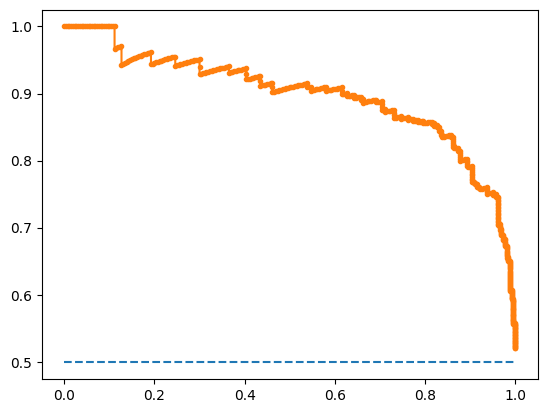

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

Точно также, как и с ROC можно вычислить соответствующую численную метрику - площадь под графиком PR-кривой - PR-AUC

In [ ]:
from sklearn.metrics import auc

auc(recall, precision)

np.float64(0.897662372903334)

Отчет о классификации по данной модели

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Давайте для сравнения попробуем обучить на этих же данных другую модель. Например, метод ближайших сосдей.

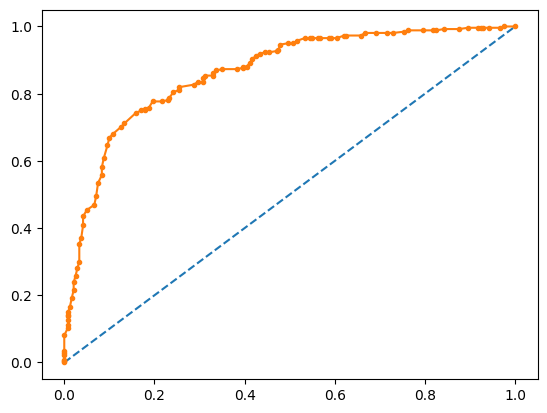

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

Наиболее явно различия между этими двумя классификационными кривыми - ROC и PR - демонстрирует пример с большим дизбалансом классов.

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


Видно, что в одной половине выборки положительных объектов в два раза больше, чем в другой. Прислучайном разделении, если есть сильно миноритарные классы, может случиться и не такое. Например, мы можем случайно получить выборку, в которой какие-то классы не представлены вообще. Для предотвращения таких случаев нужно воспользоваться стратификацией

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


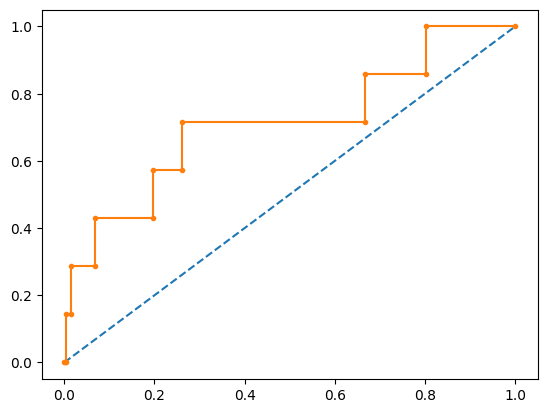

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

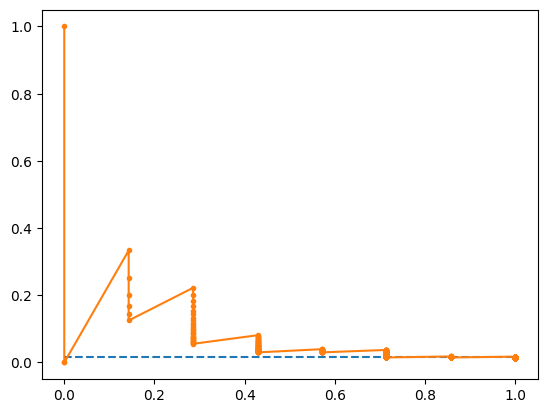

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

И вот на этом графике уже открывается истинное поведение модели: она не очень-то отличается от тривиальной, просто чаще предсказывает самый распространенный класс. Так как метрики Precision и Recall специально были созданы для случая несбалансированных классов, именно PR-кривая дает более реалистические оценки эффективности работы моделей классификации на таких данных, где наблюдается большой дисбаланс классов.

Выбор значения порога по кривым

Кривые классификации, несомненно, удобный и визуальный способ представления эффективности работы моделей машинного обучения. Но главная их ценность состоит в том, что данные, которые необходимы для их построения могут использоваться для оптимизации порога классификации.

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

Изобразим PR-кривую

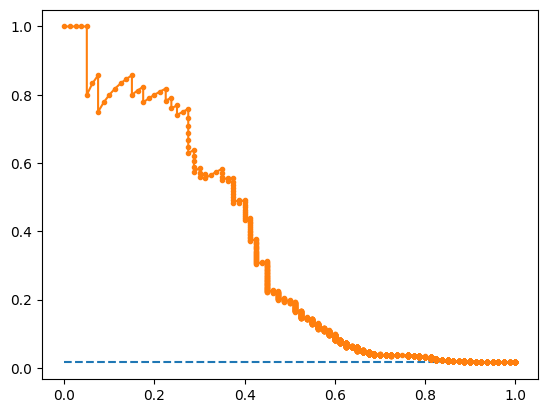

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

По точкам на ней мы видим, что при разных значениях порога иногда метрика precision будет больше, иногда - recall. Именно поэтому мы будем оптимизировать по метрике F1. Для этого импортируем из бибилиотеки numpy функцию argmax

Вычислим вектор метрик F1 при всех использованных значениях порога и найдем самое большое значение среди них (вернее, его индекс). Так как индексы всех массивов, возвращенных функцией precision_recall_curve соответственны, по этому индексу получим значение порога и соответствующее ему значение метрики F1

In [ ]:
from numpy import argmax

f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.166459, F-Score=0.448


Теперь мы можем изобразить эту точку на графике самой кривой

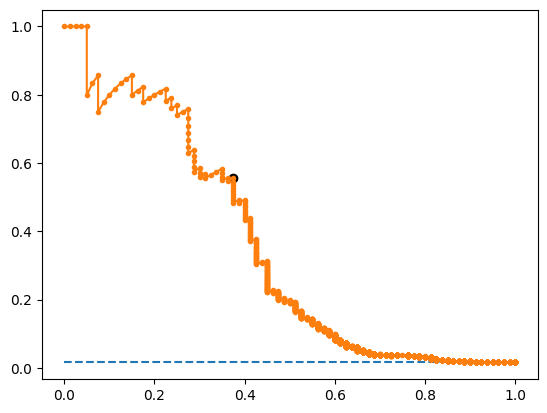

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

Обратите внимание, что мы использовали метрику F1 - это среднее геометрическое между Precision и Recall. При этом эти две метрики имеют равный вклад в среднее. Бывают ситуации, когда нам более приоритетна одна из этих двух метрик. Тогда следует использоваться параметрическую метрику из F-семейства. Мы можем придать в среднем разный вес, то есть больше предпочесть recall или, наоборот, precision.

Давайте используем данное значение порога для проведение непосредственной классификации. Раньше мы так не делали, так как всегда использовали метод predict, который всегда использует порог по умолчанию - 0,5. Но точечная классификация - это не что иное, как выбор положительного класса, если модель оценивает вероятность принадлежности к нему выше порога

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.55      0.36      0.44        80

    accuracy                           0.98      5000
   macro avg       0.77      0.68      0.71      5000
weighted avg       0.98      0.98      0.98      5000



Полученный вектор значений можно использовать при построении очета о классфикации

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.83      0.12      0.22        80

    accuracy                           0.99      5000
   macro avg       0.91      0.56      0.61      5000
weighted avg       0.98      0.99      0.98      5000



**ML4.3**

Для данной лабораторной работы будем использовать известный датасет "Ирисы Фишера"

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Для более правильного оценивания эффективности работы моделей разобьем исходную выборку на две части: тренировочную и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9130434782608695
0.8916666666666666


Отчет о классификации

<Axes: >

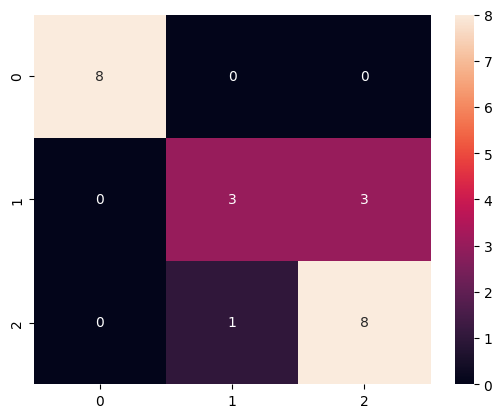

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Но заметим, что эта оценка производилась именно при данном разбиении. Что будет, если мы сделаем другое разбиение датасета на две части? Давайте повторим разбиение с другим значением random_state, обучим другую модель и выведем те же метрики

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


<Axes: >

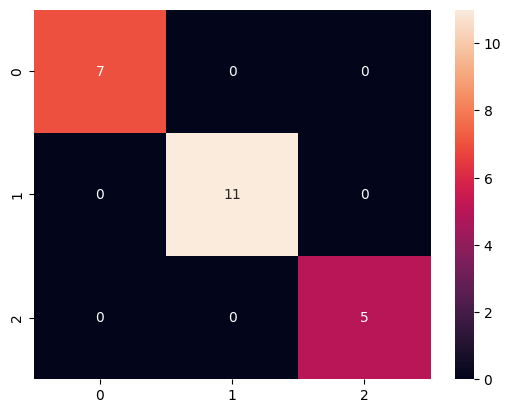

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Можно повторять эту процедуру несколько раз и каждый раз будут получаться разные значения метрик. Например при таком разбиении модель обучается гораздо хуже

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

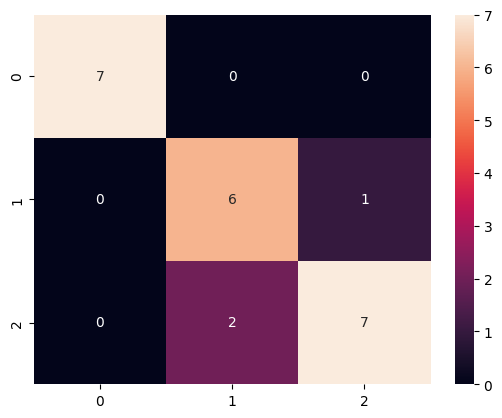

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Для устранения этих случайных колебаний и нужна перекрестная проверка или кросс-валидация.

Перекрестная проверка<br/>
Оценим работу построенной модели с помощью перекрёстной проверки.

В k-блочной перекрёстной проверке исходные данные разбиваются на
k (примерно) равных по количеству частей, называемых "блоками", на 𝑘−1 из которых производится обучение, а на 1 валидация. В результате получается более робастная оценка эффективности выбранной модели.

Создаём k-блочное разбиение (KFold)

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

Сделаем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

Сделаем кросс-валидацию

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

Выведем соответствующие массивы с метриками<br>
Выведем среднее значение метрики<br>
Это и будет наша кросс-валидированная оценка метрики. Она гораздо ближе к истинному уровню эффективности модели за счет того, что все случайные ошибки выборки усредняются. Можно еще вывести дисперсию данной оценки, которая показывает степень уверенности в ней

In [ ]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())
print("Среднее по кросс-валидации: ", np.array(metrics_f1).std())

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]
Среднее по кросс-валидации:  0.9377247812705329
Среднее по кросс-валидации:  0.03331408853235519


Выполняем кросс-валидацию с помощью функции cross_val_score

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


Stratified k-Fold<br>
Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество. Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов.

Создаём стратифицированное k-блочное разбиение (StratifiedKFold)

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

Выведем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

Выполняем кросс-валидацию с помощью функции cross_val_score

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


Leave-one-out<br>
Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.

Создаём разбиение

In [ ]:
loo = LeaveOneOut()

Сделаем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

Выполняем кросс-валидацию с помощью функции cross_val_score

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


**ML4.4**

Для первого примера воспользуемся синтетическими данными. Сгенерируем большой и достаточно сложный датасет для классификации. В нем будет 10 тысяч точек и 500 атрибутов. Из них всего 50 признаков будут информативными. Сразу после генерации разделим получившийся датасет на обучающую и тестовую выборки

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

Обучим на этом наборе данных самую простую модель - логистическую регрессию. Выведем оценки точности этой модели на обучающей и тестовой выборке

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


То, насколько отличается обучающая и тестовая эффективность модели - основной индикатор пере- или недообучения. Но по одним этим показателям очень сложно понять, в какой из двух ситуаций мы находимся. Поэтому прибегнем к построению кривых обучения. Это даст нам больше информации о том, каков уровень сложности модели по отношению к данным.

Здесь мы задаем модель, которую хотим проверить и набор долей обучающей выборки, по которым будем ее обучать. В данном случае, эта функция построит модели логистической регрессии, обученные на 10%, 20%, и так далее до 100% обучающей выборки. А затем по каждой модели будет вычислена обучающая и тестовая эффективности. И эти показатели будут изображены на графике, то есть кривой обучения

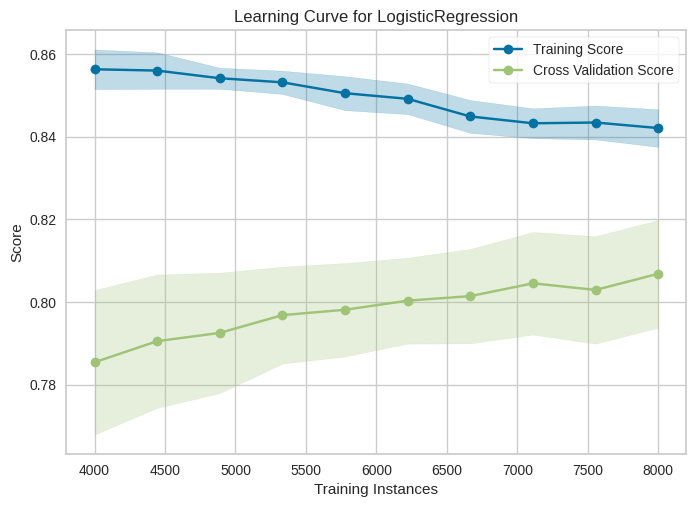

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Эта кривая показывает, что когда модель учится на небольшом объеме данных, она имеет прекрасную обучающую эффективность, но плохую тестовую. По мере увеличения объема обучающей выборки, эти эффективности сближаются, но между ними все еще сохраняется зазор

Мы воспользуемся классификатором на основе гребневой регрессии

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


При таком огромном значении регуляризации мы почти гарантированно получим недообученную модель. Поэтому полезно будет сравнить результаты модели выше с этими. Вот что получилось у очень регуляризованной модели:

Обратите внимание, что эффективность стала заметно ниже. Плюс, значения почти совпадают. То есть, почти никакой разницы не осталось. Это подтверждает наш первоначальный вывод о том, что в первой модели разница между обучающей и тестовой эффективностью получилась довольно большой для данной задачи. Построим кривые обучения для нашей второй модели

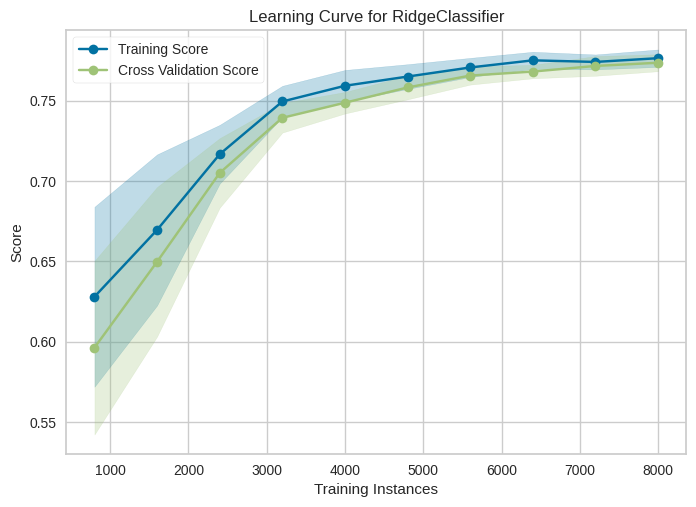

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

Если нерегуляризованная модель переобучается, а регуляризованная - недообучается, то где-то в промежутке есть оптимальная модель, котор. Для того, чтобы проанализировать данную задачу еще более глубоко построим график зависимости эффективности модели от значения параметра регуляризации. Для этого воспользуется логравномерным распределением

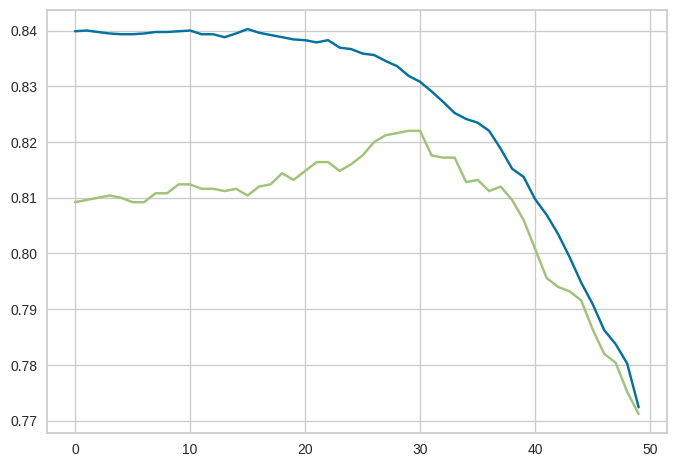

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

Данный код построит 50 моделей, различающихся только параметром регуляризации. Он будет лежать в диапазоне от 100 до 100 000. Диапазон подбирается эмпирически, интересующий нас интервал значений параметров регуляризации будет разный в других задачах.

Здесь мы видим, что при определенных значениях параметра регуляризации тестовая эффективность модели (а нас в конечном итоге интересует именно она) лучше, чем во всех остальных. Подбором или алгоритмически можно найти такое оптимальное значение параметра регуляризации. Оно дает нам модель, которая имеет оптимальный уровень сложности для данного конкретного датасета.

Давайте выведем получившиеся показатели

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


Эта модель получилась немного лучше, чем самая первая, модель логистической регрессии. Это произошло потому, что мы за счет регуляризации убрали негативный эффект переобучения.Давайте построим кривые обучения, чтобы посмотреть, как они выглядят для "хорошей" модели.

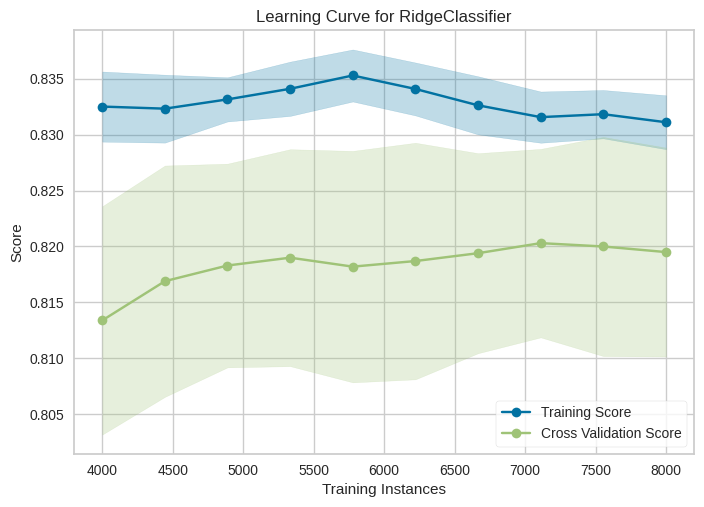

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Опять же, с оглядкой на масштаб вертикальной оси мы видим, что и уровень эффективности выше, чем в первой модели и разница между двумя эффективностями тоже сократилась. И то и другое - это свидетельство большей обобщающей способности модели.

Диагностика моделей регрессии<br/>
Для более реалистичного примера загрузим датасет цен на недвижимость

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/boston_housing.csv')
X = dataset.drop('medv', axis=1)
y = dataset['medv']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7698
Test score: 0.6355


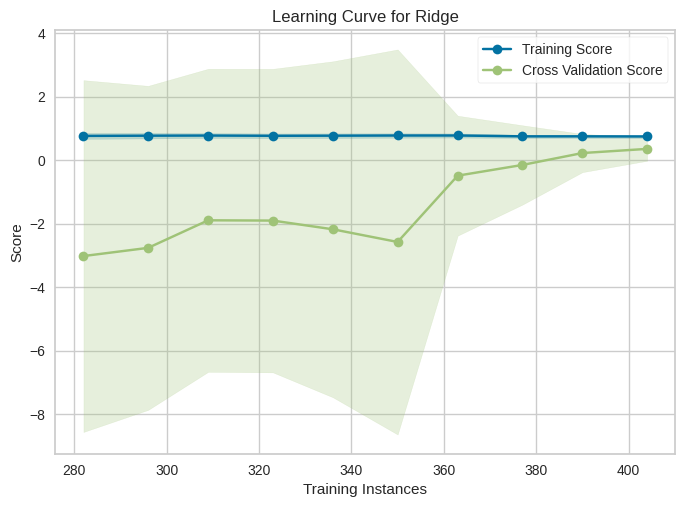

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()

Обратите внимание, что промежуток между обучающей и тестовой эффективностью все равно очень большой в правой части графика, хоть чисто визуально и не выглядит таковым. Просто тестовая эффективность в левой части графика просто ужасна, и она сильно смещает вертикальную ось вниз. Тем не менее, можно обоснованно предположить, что такая модель переобучается на имеющихся данных.

Сразу построим график зависимости эффективности модели от значения параметра L2-регуляризации

In [ ]:
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

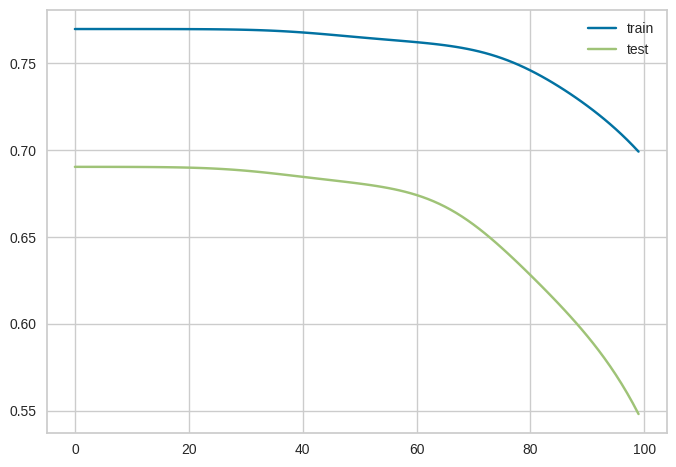

In [ ]:
trains = []
tests = []
for i in np.logspace(-2, 3, 100):
  trains.append(Ridge(alpha=i).fit(X_train, y_train).score(X_train, y_train))
  tests.append(Ridge(alpha=i).fit(X_test, y_test).score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

На этом графике очень наглядно виден характер кривых регуляризации. В левой области лежат значения, которые дают слишком сложные модели. Они хорошо описывают обучающую выборку, но не обобщаются на тестовую. Это зона переобучения. В правой области - значения, порождающие слишком простые модели. Они одинаково плохо описывают и обучающую и тестовые выборки. Это зона недообучения. Посередине между ними лежит оптимальный уровень сложности модели для данного конкретного датасета.

Численно можно подобрать оптимальное значение параметра регуляризации для гребневой регрессии. Давайте выведем эффективность такой оптимальной модели

In [ ]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.77
Linear Regression-Test set score: 0.63


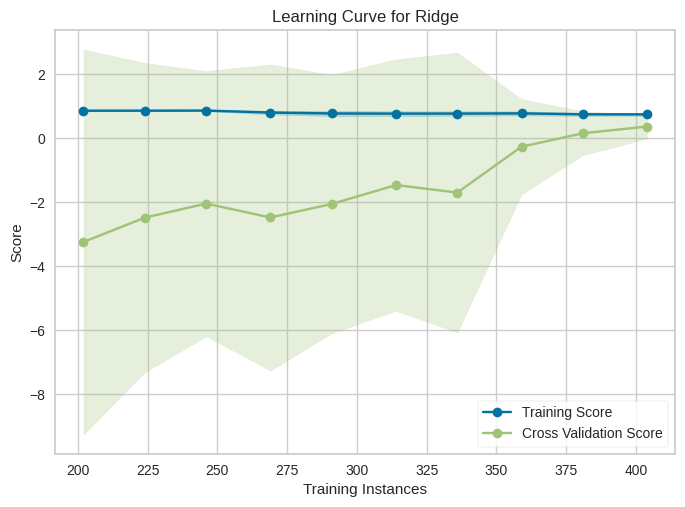

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Здесь можно заметить, что несмотря на то, что мы подобрали наилучший уровень сложности модели, ее эффективность все равно не идеальна. Присутствует и разница между тестовой и обучающей эффективностью. Это свидетельствует о том, что и в нашей самой лучшей модели все равно имеется и bias и variance в какой-то степени. И хоть мы нашли лучшую модель, она лучшая из одного отдельного класса моделей - гребневой регрессии.

Поэтому можно исследовать на этом же датасете и другие модели. Так, например, можно попробовать другой вид регуляризации - лассо. В библиотеке sklearn эта модель работает только как регрессор, то есть она не подходит для задач классификации. Поэтому мы не могли использовать ее в предыдущем примере. Сразу построим кривые регуляризации

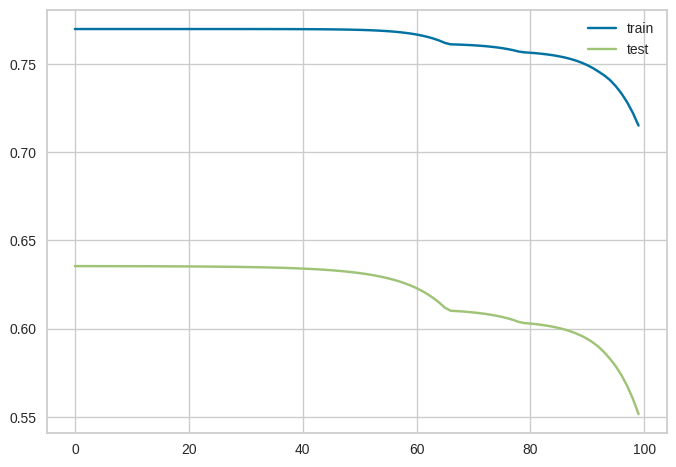

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Диагностика на реальных данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для моделирования выберем совершенно другой тип модели - решающие деревья. Создадим объект модели дерева решений и исследуем его эффективность

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


Даже без построения кривых обучения здесь очевидно переобучение модели. Но все же для тренировки распознавания разных ситуаций на графике построим кривую обучения

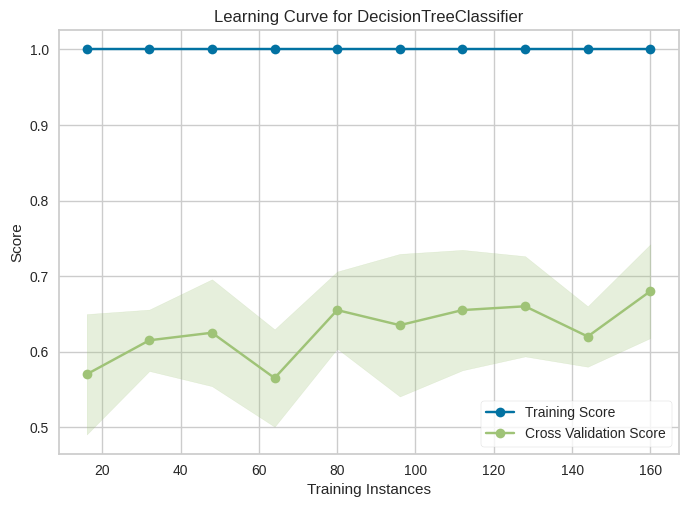

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

У деревьев решений один из параметров - максимальная глубина дерева как раз и влияет на склонность модели к переобучению. Аналогом регуляризации для деревьев будет искусственное ограничение максимальной глубины дерева. Давайте построим кривую обучения для такого регуляризованного дерева

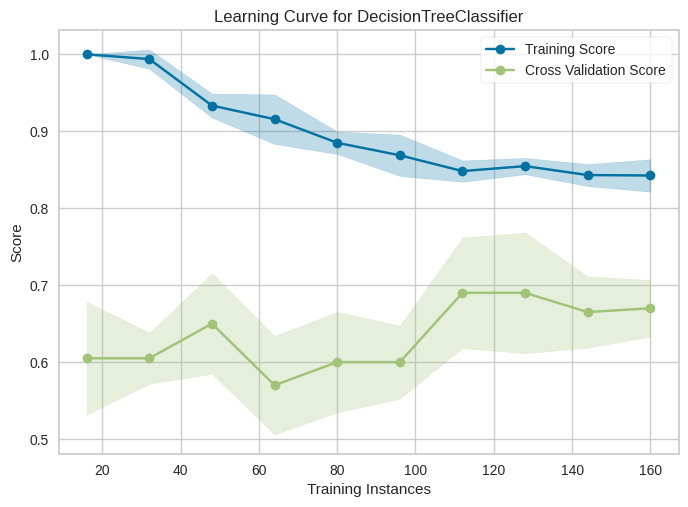

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

Выведя метрики эффективности получаем более высокое качество модели на тестовых данных

In [ ]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 0.8350
Test f1_score = 0.6154


Введение регуляризации, искусственное упрощение моделей - не единственный способ борьбы с переобучением. Самый лучший способ - это обучение на более полном датасете, то есть добавление большого количества данных. В этом примере мы специально не использовали весь имеющийся набор данных. На части модель сильно переобучается, но чем больше данных, тем меньше модели (даже одинаковые по сложности) становятся склонными к переобучению.

Для иллюстрации этого повторим обучение нерегуляризованного дерева решений на всем датасете

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


Получившаяся модель значительно лучше, чем даже регуляризованное дерево. В общем случае, добавление данных работает лучше, чем регуляризация.

Диагностика недообучения

В sklearn есть встроенный механизм загрузки датасетов из онлайн репозитория OpenML. Возьмем оттуда датасет, посвященный проблеме управления истребителем F16

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

Сформируем обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создадим и оценим простую модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


Построим кривую обучения данной модели

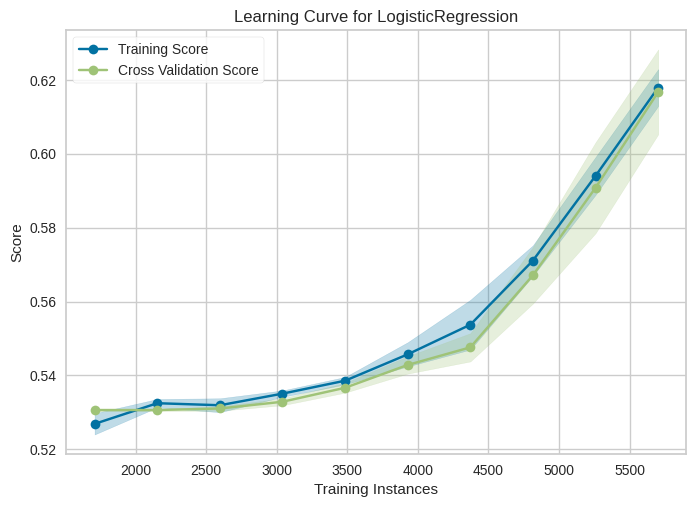

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

Здесь очевидны признаки недообучения: низкий уровень обучающей эффективности, малый разрыв между обучающей и тестовой эффективностью. При недообучении регуляризация не поможет, даже навредит, так как еще усилит его. Поэтому единственный путь в этом случае - использовать более сложные, вариативные модели. Можно, например, попробовать многослойный перцептрон

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9390
Test score = 0.9397


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

visualizer = LearningCurve(
    MLPClassifier(max_iter=500, alpha=0.0001, learning_rate_init=0.001, hidden_layer_sizes=(100, 50)), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
)

visualizer.fit(X, y)
visualizer.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Кроме использования более вариативных моделей самих по себе можно ввести в модель полиномиальные признаки

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


Полиномиальные модели являются естественным усложнением линейных и поэтому в случае недообучения исходной модели почти всегда обеспечивают увеличение эффективности модели

Для этой полиномиальной модели уже можно пробовать использовать регуляризацию и строить соответствующие кривые

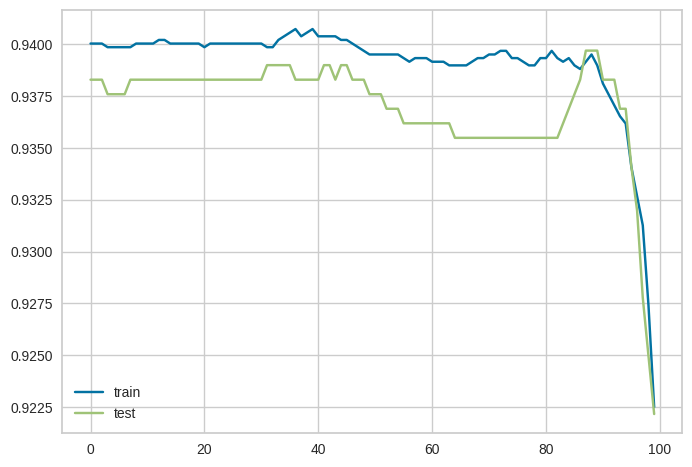

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

В этом примере (как и во многих других реальных случаях) кривая регуляризации уже не такая очевидная и легко читаемая. Но и на ней можно при желании разглядеть область недообучения справа. Область переобучения здесь просматривается не так четко, так как тестовая эффективность практически не падает с уменьшением параметра регуляризации

Также можно заметить, что этот график уже не такой гладкий и ровный, как в предыдущих примерах. На нем присутствуют скачки, неравномерности. Это все случайные отклонения, которые обусловлены и артефактами в самих данных, и стохастичностью процесса обучения сложных моделей и случайными ошибками выборки, возникшими при разделении датасета на тестовую и обучающую выборки.